In this experiment we aim to predict the pricing of the Paris houses using the independent variables. The prediction model to be used is the linear regression model. This is a regression task. There is a total of 17 different variables in this experiment, and the independent variables are squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, basement, attic, garage, hasStorageRoom, hasGuestRoom, category, and PoolAndYard. The dependent variable is the price. The public dataset link is: https://www.kaggle.com/datasets/aleshagavrilov/parishousing


QNA

1)What are the data types? (Only numeric and categorical)

2)Are there missing values?

3)What are the likely distributions of the numeric variables?

4)Which independent variables are useful to predict a target (dependent variable)? 

5)Which independent variables have missing data? How much?

6)Do the training and test sets have the same data?

7)In the predictor variables independent of all the other predictor variables?

8)Which predictor variables are the most important?

9)Do the ranges of the predictor variables make sense?

10)What are the distributions of the predictor variables?

11)Remove outliers and keep outliers (does if have an effect of the final predictive model)?

12)Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?



In [ ]:
import pandas as  pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as train_test_split 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ParisHousing.csv') 

# DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

Q1: What are the data types?

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [ ]:
numeric_data.shape[1]

12

In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1   squareMeters   10000 non-null  int64  
 2   floors         10000 non-null  int64  
 3   cityCode       10000 non-null  int64  
 4   cityPartRange  10000 non-null  int64  
 5   numPrevOwners  10000 non-null  int64  
 6   made           10000 non-null  int64  
 7   basement       10000 non-null  int64  
 8   attic          10000 non-null  int64  
 9   garage         10000 non-null  int64  
 10  hasGuestRoom   10000 non-null  int64  
 11  price          10000 non-null  float64
dtypes: float64(1), int64(11)
memory usage: 937.6 KB


In [ ]:
df.shape

(10000, 18)

Q2: Are there missing values?

There are no missing value present in the dataset. 

In [ ]:
df.isnull().sum()

Unnamed: 0           0
squareMeters         0
numberOfRooms        0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
PoolAndYard          0
dtype: int64

Q5) Which independent variables have missing data? How much?

There is no missing data in this dataset

In [ ]:
missing_list = df.columns[df.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(df[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / df.shape[0]) * 100
Missing_DF

,Missing_Column,Missing_Values,%_Missing


Q3: What are the likely distributions of the numeric variables?


Firstly I created a dataframe (data_norm) which contained only the numerical variables and then using qqplot, plotted to check the distributions of these variables

A Q-Q plot (Quantile-Quantile plot) is used to compare the distribution of two datasets. Some of the common distributions that can be represented in a Q-Q plot are:

Normal distribution: If the points in the Q-Q plot follow a straight line, it indicates that the data follows a normal distribution.

Log-normal distribution: If the points in the Q-Q plot follow an S-shaped curve, it indicates that the data follows a log-normal distribution.

Exponential distribution: If the points in the Q-Q plot follow a downward sloping line, it indicates that the data follows an exponential distribution.

Weibull distribution: If the points in the Q-Q plot follow an upward sloping line, it indicates that the data follows a Weibull distribution.

Pareto distribution: If the points in the Q-Q plot follow a curved line, it indicates that the data follows a Pareto distribution.

Lognormal distribution: If the points in the Q-Q plot follow a U-shaped curve, it indicates that the data follows a lognormal distribution.

<Figure size 576x360 with 0 Axes>

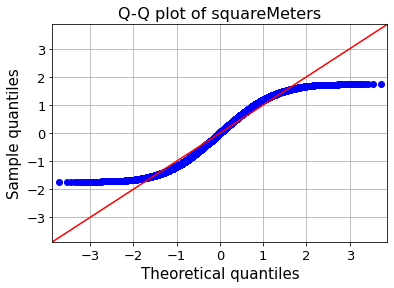

<Figure size 576x360 with 0 Axes>

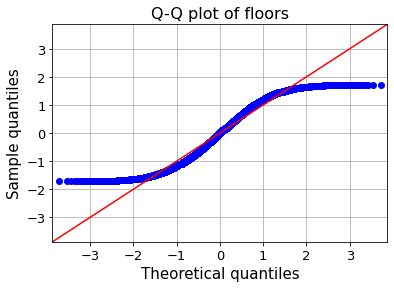

<Figure size 576x360 with 0 Axes>

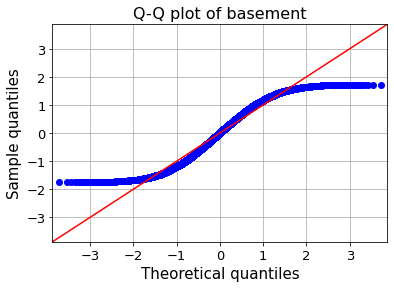

<Figure size 576x360 with 0 Axes>

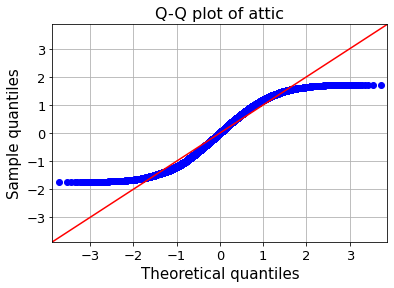

<Figure size 576x360 with 0 Axes>

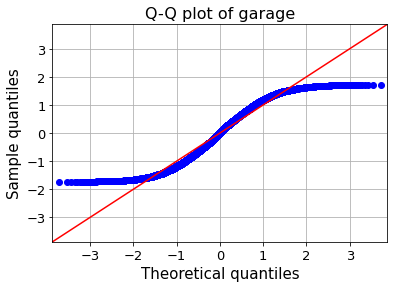

<Figure size 576x360 with 0 Axes>

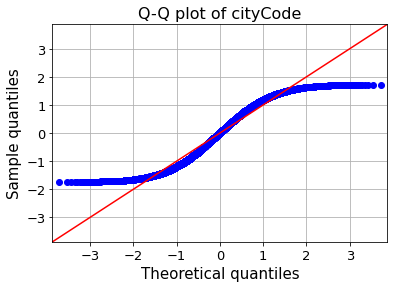

<Figure size 576x360 with 0 Axes>

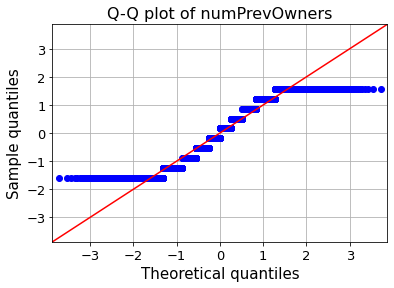

<Figure size 576x360 with 0 Axes>

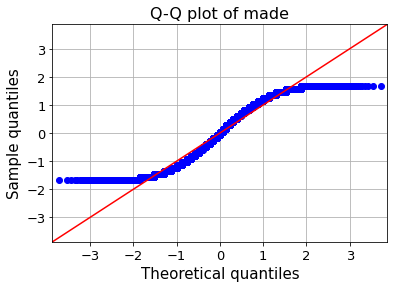

In [ ]:
#checking the distribution of independent variables (numerical ONLY)
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['squareMeters', 'floors',
       'basement', 'attic', 'garage', 'cityCode', 'numPrevOwners', 'made']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Based on the QQ-plot, all of the independent variables(numerical) are following the normal distribution 


Q9: Do the ranges of the predictor variables make sense?


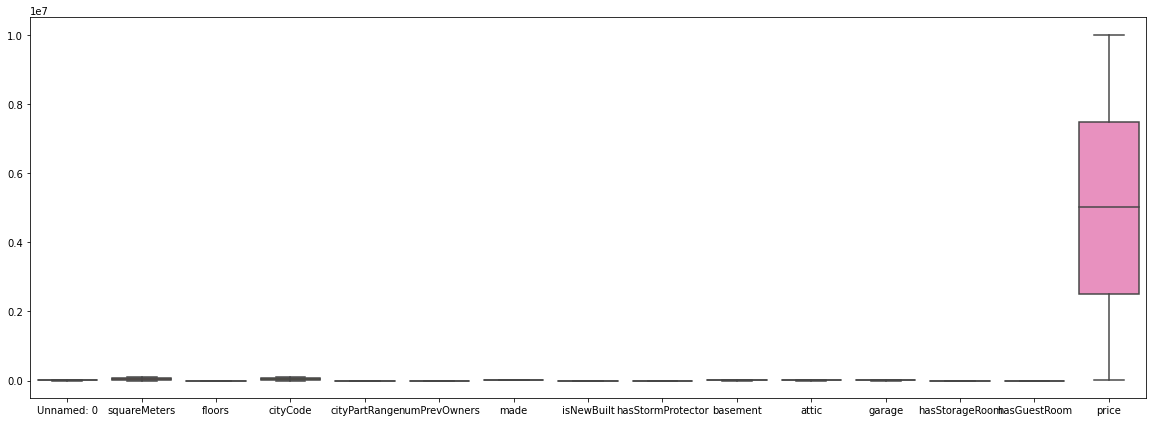

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

Based on the box plot above, the dataset is hard to be visualize as they are not in the same range, hence MINMAX normalization is needed for easy and better understandings. 

# Data Transforming, Feature Creation and Analysis. 

# Label encoding

Label coding is a neccessary step to convert the categorical variable to numerical form. So it is readeble by the computer. 

In [ ]:
#isNewBuilt
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['isNewBuilt']= label_encoder.fit_transform(df['isNewBuilt'])
  
df['isNewBuilt'].unique()

array([0, 1])

In [ ]:
#hasStormProtector
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['hasStormProtector']= label_encoder.fit_transform(df['hasStormProtector'])
  
df['hasStormProtector'].unique()

array([1, 0])

In [ ]:
#category
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['category']= label_encoder.fit_transform(df['category'])
  
df['category'].unique()

array([0, 1])

In [ ]:
#hasStorageRoom
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['hasStorageRoom']= label_encoder.fit_transform(df['hasStorageRoom'])
  
df['hasStorageRoom'].unique()

array([0, 1])

In [ ]:
df["numberOfRooms"].value_counts()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

result = label_encoder.fit_transform(df["numberOfRooms"])

df["numberOfRooms"] = result

print(df["numberOfRooms"])

0       87
1       81
2       15
3       31
4       38
        ..
9995     6
9996    93
9997    87
9998    53
9999     5
Name: numberOfRooms, Length: 10000, dtype: int64


In [ ]:
df["PoolAndYard"].value_counts()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

result = label_encoder.fit_transform(df["PoolAndYard"])

df["PoolAndYard"] = result

print(df["PoolAndYard"])

0       1
1       0
2       1
3       3
4       0
       ..
9995    1
9996    0
9997    3
9998    3
9999    3
Name: PoolAndYard, Length: 10000, dtype: int64


In [ ]:
df

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,87,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1
1,1,80771,81,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1,0
2,2,55712,15,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0,1
3,3,32316,31,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0,3
4,4,70429,38,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1726,6,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0,1
9996,9996,44403,93,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0,0
9997,9997,83841,87,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0,3
9998,9998,59036,53,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0,3


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

Based on the ranges above, we normalize the price because the value is too high as compared to other variables. 

In [ ]:
# Normalizing the data in the price column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = df[['price']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['price']] = pd.DataFrame(x_scaled)

In [ ]:
#data after nromalizing and feature creation
df.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,87,63,9373,3,8,2005,0,1,4313,9005,956,0,7,0.755144,0,1
1,80771,81,98,39381,8,6,2015,1,0,3653,2436,128,1,2,0.807854,1,0
2,55712,15,19,34457,6,8,2021,0,0,2937,8852,135,1,9,0.556630,0,1
3,32316,31,6,27939,10,4,2012,0,1,659,7141,359,0,3,0.322339,0,3
4,70429,38,90,38045,3,7,1990,1,0,8435,2429,292,1,4,0.704723,1,0


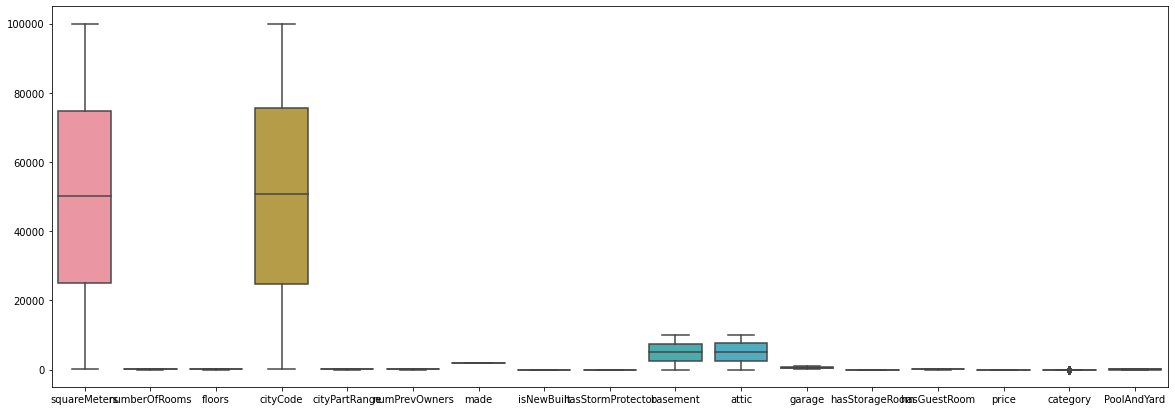

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [ ]:
# Create x to store scaled values as floats
x = df[['squareMeters']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['squareMeters']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['cityCode']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['cityCode']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['attic']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['attic']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['basement']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['basement']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['garage']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['garage']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['made']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['made']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['floors']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['floors']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['numberOfRooms']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['numberOfRooms']] = pd.DataFrame(x_scaled)

In [ ]:
# Create x to store scaled values as floats
x = df[['category']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['category']] = pd.DataFrame(x_scaled)

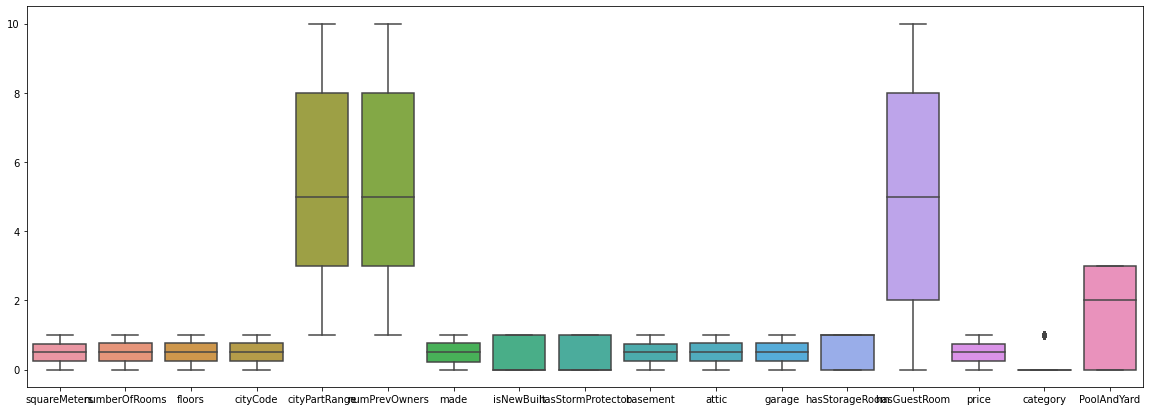

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

Based on the ranges above, 
1. There are no present of outliers on the independent variables above
2. IsNewBuilt, hasStormProtection, hasStorageRoom are categorical variables therefore they are almost similar with eachother, only PoolAndYard and category has very huge difference from other categorical variable. 
3. squareMeters, numberOfRooms, Floors, cityCode, made, basement, attic, garage, and price have similar ranges, becuase they are numerical variables. 
4. cityPartRange, numPrevOwners and numGuestRoom have larger range as compared to others. 


# Feature Selection Using Correlation -HeatMap

Q7:	In the predictor variables independent of all the other predictor variables? 


No, some independent variables are not independent of each other. There is multi - collinearity among two of the independent variables which is shown by the correlation heatmap below.

In [ ]:
#checking the correlation between all the features in the data
df.corr()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
squareMeters,1.000000,0.007557,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,-0.011800,0.007928
numberOfRooms,0.007557,1.000000,0.004305,-0.012599,-0.011722,-0.003850,0.005425,-0.007070,0.012628,-0.003359,-0.009678,-0.019507,-0.011611,0.005371,0.007563,0.014980,-0.008714
floors,0.001109,0.004305,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.003827,0.003954
cityCode,-0.001541,-0.012599,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539,0.003950,-0.010180
cityPartRange,0.008758,-0.011722,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.003171,-0.015222
numPrevOwners,0.016619,-0.003850,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.012843,0.004186
made,-0.007207,0.005425,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210,0.005399,-0.002667
isNewBuilt,-0.010667,-0.007070,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643,0.381237,0.003552
hasStormProtector,0.007480,0.012628,-0.008566,-0.004941,0.005224,0.002522,-0.000645,0.003200,1.000000,-0.005001,-0.003753,0.003758,0.001401,-0.006549,0.007496,0.002182,0.004267
basement,-0.003960,-0.003359,0.006228,0.002652,0.004743,-0.000862,-0.005506,-0.015986,-0.005001,1.000000,-0.003180,0.000117,-0.010815,-0.020732,-0.003967,-0.011310,0.010264


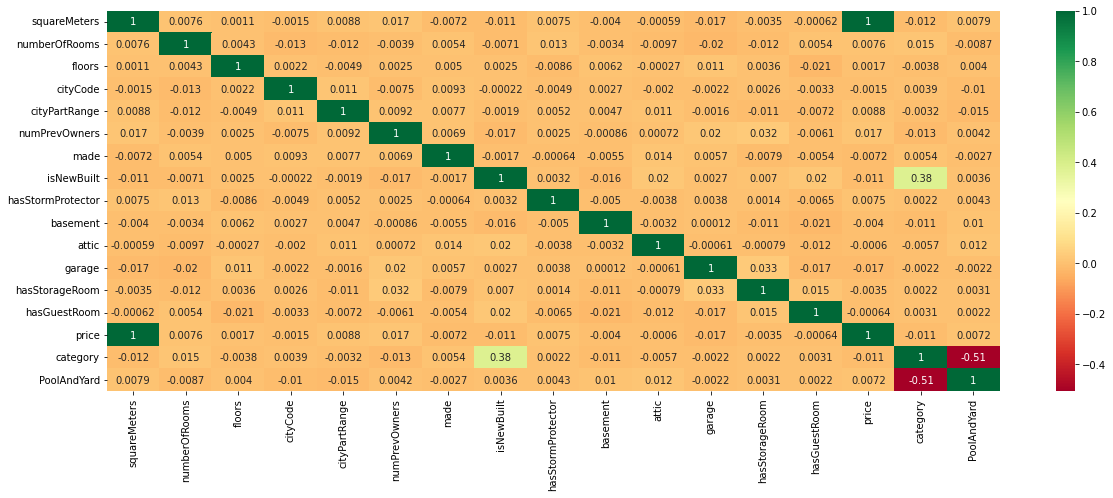

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

based on the correlation heatmap above, the dependent variable ('price') and the independent variable ('squareMeters') is highly correlated with each other, hence, we remove the squareMeters variable. Other than that, the coorelation between the independnet variables such as category and isNewBuilt are highly correlated with each other, hence we remove one of the idependent variable. 

In [ ]:
df = df.drop(columns=['squareMeters'])
df = df.drop(columns=['category'])

In [ ]:
df

,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,PoolAndYard
0,0.878788,0.626263,0.093747,3,8,0.483871,0,1,0.4313,0.900490,0.951111,0,7,0.755144,1
1,0.818182,0.979798,0.393977,8,6,0.806452,1,0,0.3653,0.243524,0.031111,1,2,0.807854,0
2,0.151515,0.181818,0.344712,6,8,1.000000,0,0,0.2937,0.885189,0.038889,1,9,0.556630,1
3,0.313131,0.050505,0.279500,10,4,0.709677,0,1,0.0659,0.714071,0.287778,0,3,0.322339,3
4,0.383838,0.898990,0.380610,3,7,0.000000,1,0,0.8435,0.242824,0.213333,1,4,0.704723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.060606,0.040404,0.731666,7,6,0.612903,0,1,0.9311,0.169717,0.131111,0,4,0.016617,1
9996,0.939394,0.111111,0.346203,9,4,0.000000,0,1,0.9061,0.174117,0.144444,0,0,0.443973,0
9997,0.878788,0.686869,0.809705,10,10,0.483871,1,1,0.8304,0.772977,0.272222,1,9,0.838269,3
9998,0.535354,0.959596,0.558809,1,3,0.645161,0,1,0.2590,0.617362,0.265556,1,4,0.589688,3


In [ ]:
#save to new csv 

df.to_csv(r"/content/ParisHousing.csv")

In [ ]:
df

,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,PoolAndYard
0,0.878788,0.626263,0.093747,3,8,0.483871,0,1,0.4313,0.900490,0.951111,0,7,0.755144,1
1,0.818182,0.979798,0.393977,8,6,0.806452,1,0,0.3653,0.243524,0.031111,1,2,0.807854,0
2,0.151515,0.181818,0.344712,6,8,1.000000,0,0,0.2937,0.885189,0.038889,1,9,0.556630,1
3,0.313131,0.050505,0.279500,10,4,0.709677,0,1,0.0659,0.714071,0.287778,0,3,0.322339,3
4,0.383838,0.898990,0.380610,3,7,0.000000,1,0,0.8435,0.242824,0.213333,1,4,0.704723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.060606,0.040404,0.731666,7,6,0.612903,0,1,0.9311,0.169717,0.131111,0,4,0.016617,1
9996,0.939394,0.111111,0.346203,9,4,0.000000,0,1,0.9061,0.174117,0.144444,0,0,0.443973,0
9997,0.878788,0.686869,0.809705,10,10,0.483871,1,1,0.8304,0.772977,0.272222,1,9,0.838269,3
9998,0.535354,0.959596,0.558809,1,3,0.645161,0,1,0.2590,0.617362,0.265556,1,4,0.589688,3


# Identifying Predictor Significance

Q10: What are the distributions of the predictor variables?

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['price'], df[['isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              1928.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        06:16:34   Log-Likelihood:                         -2120.3
No. Observations:               10000   AIC:                                      4269.
Df Residuals:                    9986   BIC:                                      4370.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
isNewBuilt            0.0209      0.006      3.534      0.000       0.009       0.032
numberOfRooms         0.0908      0.010      9.315      0.000       0.072       0.110
floors                0.0808      0.010      8.202      0.000       0.061       0.100
cityCode              0.0808      0.010      8.181      0.000       0.061       0.100
cityPartRange         0.0099      0.001     10.048      0.000       0.008       0.012
numPrevOwners         0.0106      0.001     10.650      0.000       0.009       0.013
made                  0.0653      0.010      6.796      0.000       0.046       0.084
hasStormProtector     0.0313      0.006      5.301      0.000       0.020       0.043
basement              0.0807      0.010      8.119      0.000       0.061       0.100
attic                 0.0798      0.010      8.045      0.000       0.060       0.099
garage                0.0623      0.010      6.309      0.000       0.043       0.082
hasStorageRoom        0.0230      0.006      3.885      0.000       0.011       0.035
hasGuestRoom          0.0072      0.001      7.945      0.000       0.005       0.009
PoolAndYard           0.0180      0.003      6.929      0.000       0.013       0.023
==============================================================================
Omnibus:                     2329.065   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.835
Skew:                          -0.004   Prob(JB):                     6.82e-92
Kurtosis:                       1.996   Cond. No.                         34.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the p-values of the independent variables are less than 0.05, which means that the variables are significant/ not normally distributed.

# Outlier Visualization

Q11: Remove outliers and keep outliers (does if have an effect of the final predictive model)?
 -There are no outliers appear within the data. 


In [ ]:
numeric_df=pd.DataFrame([df.cityCode,df.cityPartRange,df.numPrevOwners,df.basement,df.attic,df.garage,df.hasGuestRoom,df.price]).transpose()

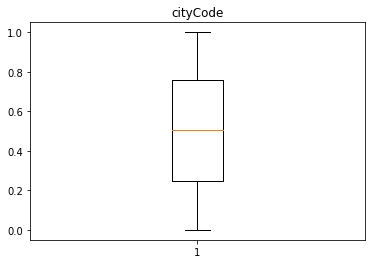

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



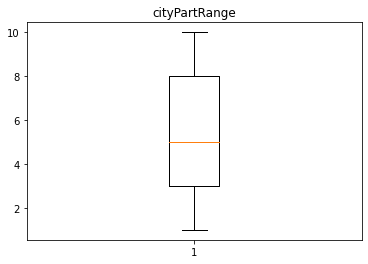

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



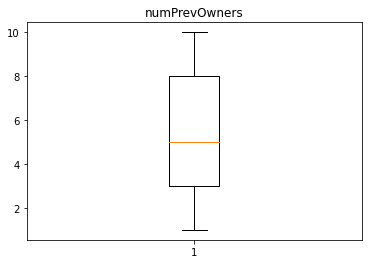

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



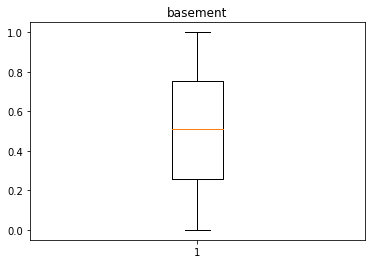

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



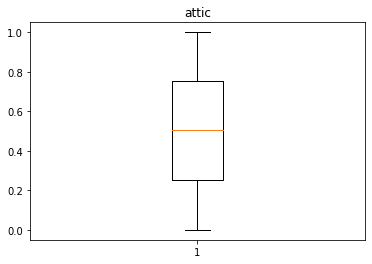

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



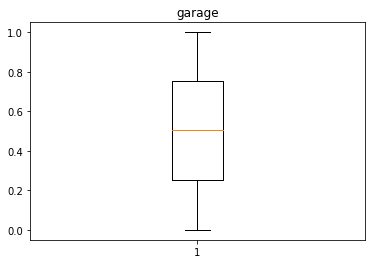

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



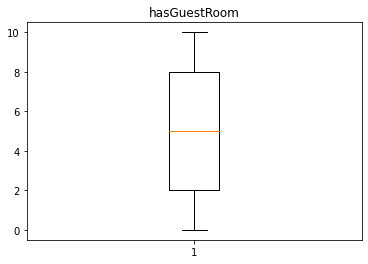

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



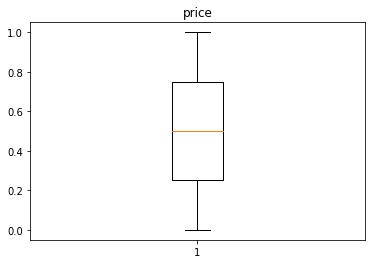

<Figure size 720x504 with 0 Axes>



The Outliers are :  []


#################################################################################################



In [ ]:
#finding the outlier in data 

for i in numeric_df.columns:
  plt.title(i)
  plt.boxplot(numeric_df[i])
  fig = plt.figure(figsize =(10, 7))
  
  plt.show()
  
  q1 = np.quantile(numeric_df[i], 0.25)
 
  # finding the 3rd quartile
  q3 = np.quantile(numeric_df[i], 0.75)
  med = np.median(numeric_df[i])
 
  # finding the iqr region
  iqr = q3-q1
 
  # finding upper and lower whiskers
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  outliers = numeric_df[i][(numeric_df[i] <= lower_bound) | (numeric_df[i] >= upper_bound)]
  print("\n")
  print('The Outliers are : ',np.array(outliers))
  print("\n")

  print("#################################################################################################\n")


# Data Splitting

In [ ]:
from sklearn.model_selection import  train_test_split

X = df[[ 'isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard']]

y = df['price']

#Spliting data into Training 80%, Validation set 10% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)

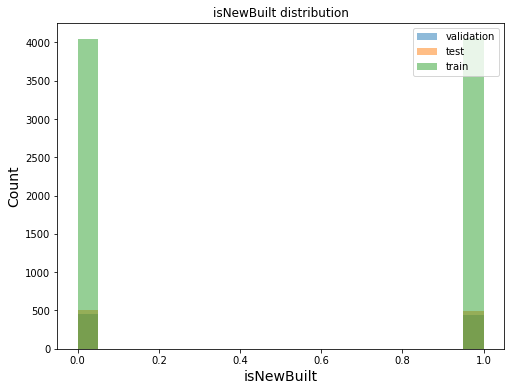

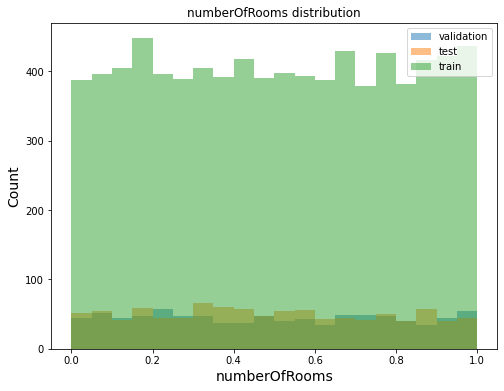

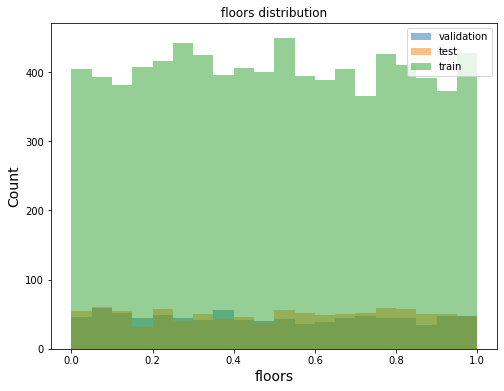

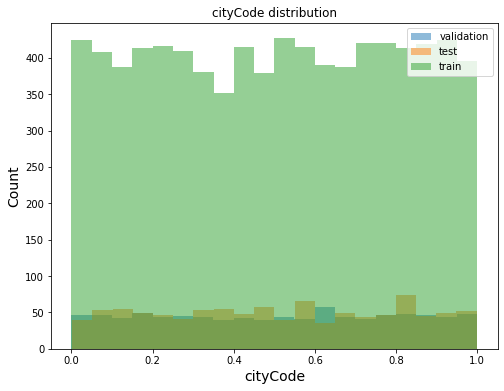

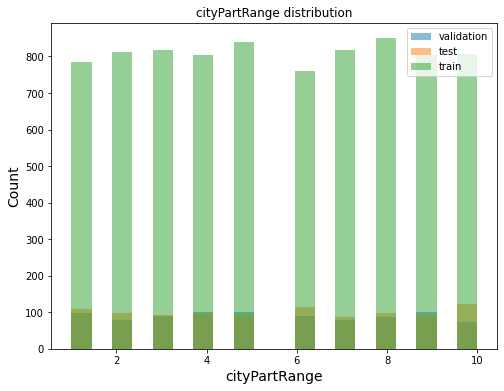

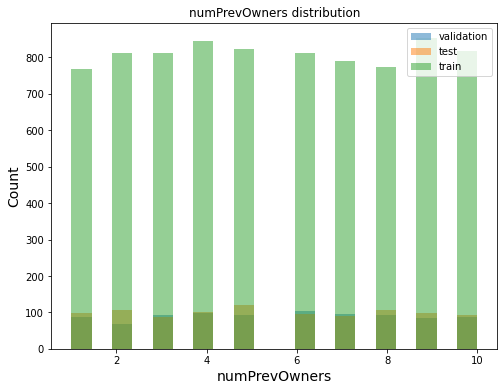

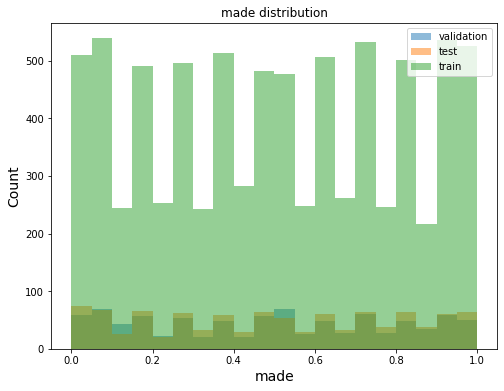

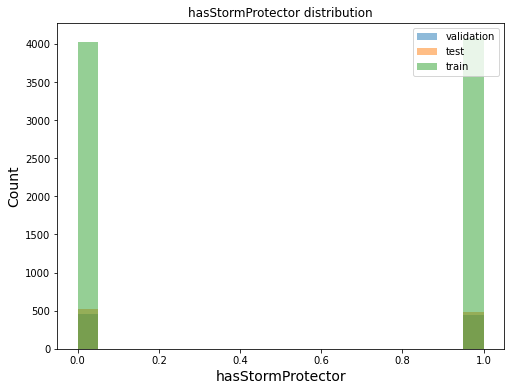

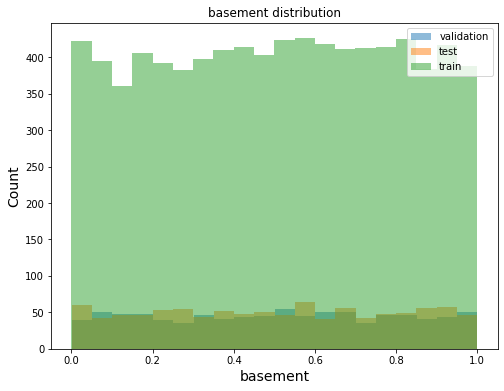

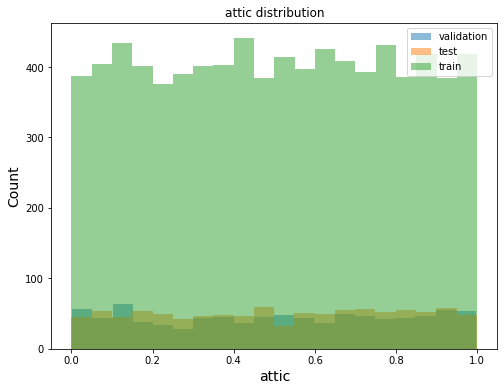

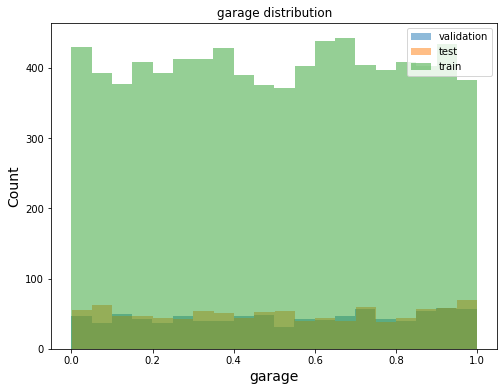

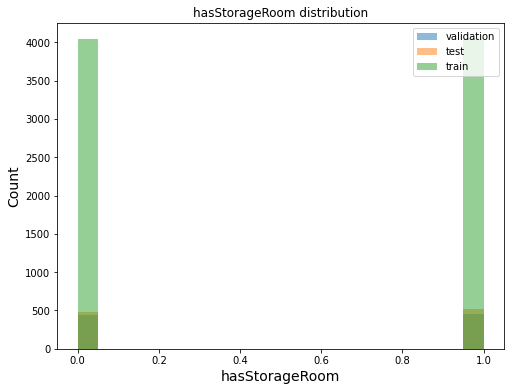

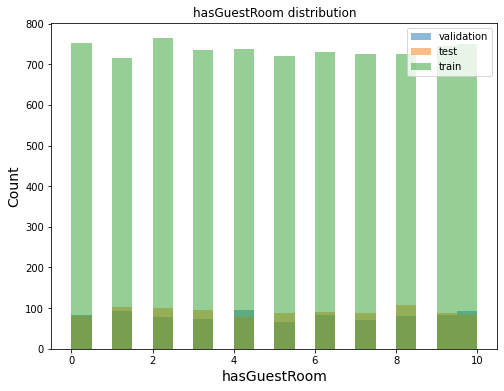

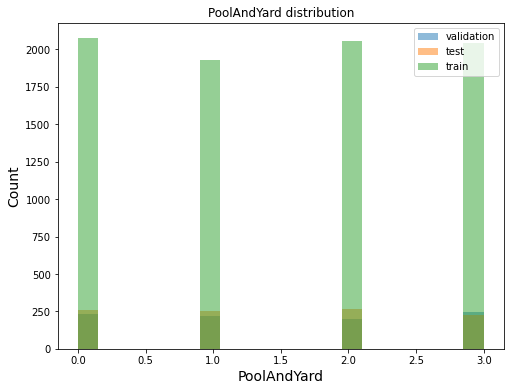

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test [['isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard']]

X_val_plot = X_val[[  'isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard']]

X_train_plot = X_train[[ 'isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

The distribution of validation, test and train set seems to be normal in all of the independent variables(no missing values).

Q6: Do the training and test sets have the same data?

Check if the training and testing dataset is the same distribution 

In [ ]:
def check_same_data(X_train, X_test):
    # Convert data to pandas DataFrames if necessary
    X_train = pd.DataFrame(X_train) if not isinstance(X_train, pd.DataFrame) else X_train
    X_test = pd.DataFrame(X_test) if not isinstance(X_test, pd.DataFrame) else X_test

    # Check if the number of columns in the training and test data is the same
    if X_train.shape[1] != X_test.shape[1]:
        return False

    # Check if the columns in the training and test data are the same
    for col in X_train.columns:
        if col not in X_test.columns:
            return False

    # Calculate the mean and standard deviation of each column in the training data
    train_mean = X_train.mean()
    train_std = X_train.std()

    # Calculate the mean and standard deviation of each column in the test data
    test_mean = X_test.mean()
    test_std = X_test.std()

    # Check if the mean and standard deviation of each column in the training and test data are the same
    for col in X_train.columns:
        if not np.isclose(train_mean[col], test_mean[col], rtol=1e-5) or not np.isclose(train_std[col], test_std[col], rtol=1e-5):
            return False

    return True

In [ ]:
result = check_same_data(X_train, X_test)

if result:
    print("The training and test data have the same data.")
else:
    print("The training and test data do not have the same data.")

The training and test data do not have the same data.


# LINEAR REGRESSION (Model Fitting)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

# Making Predictions (WITHOUT OUTLIERS)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.08
Coefficient of determination: 0.00
R^2 score on training set = 0.0017078490897532994


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.08
Coefficient of determination: -0.01
R^2 score on test set = -0.0065156004710593685


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.08
Coefficient of determination: -0.01
R^2 score on validation set = -0.005007020899948866


# Now we generate outliers and make predictions 

In [ ]:
import pandas as pd
import numpy as np

# Calculate the mean and standard deviation of the data for each column
mean = df.mean()
std = df.std()

# Generate a set of outliers
outliers = np.random.normal(mean, std, (5, df.shape[1])) * 5

# Concatenate the outliers with the original dataset
df = pd.concat([df, pd.DataFrame(outliers, columns=df.columns)])

# Verify the result
print(df)

    numberOfRooms    floors  cityCode  cityPartRange  numPrevOwners      made  \
0        0.878788  0.626263  0.093747       3.000000       8.000000  0.483871   
1        0.818182  0.979798  0.393977       8.000000       6.000000  0.806452   
2        0.151515  0.181818  0.344712       6.000000       8.000000  1.000000   
3        0.313131  0.050505  0.279500      10.000000       4.000000  0.709677   
4        0.383838  0.898990  0.380610       3.000000       7.000000  0.000000   
..            ...       ...       ...            ...            ...       ...   
0        3.519926  1.430020  0.505037       4.819313      36.326753  0.713305   
1        3.086561 -1.556647  5.350525      33.152287      18.289930  1.911205   
2        3.394028  0.963626  4.269824      37.456372      46.203204  1.555194   
3        0.586974  4.907996  2.340917      17.783059      37.126672  1.806464   
4        2.640019  2.427172  2.096090      26.665537      26.075823  1.417800   

    isNewBuilt  hasStormPro

Check for outliers

In [ ]:
import pandas as pd
import numpy as np

# Calculate the Z-scores of each value in the dataset
z_scores = (df - df.mean()) / df.std()

# Identify the outliers based on the Z-scores
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Print the outliers
print(outliers)

   numberOfRooms     floors   cityCode  cityPartRange  numPrevOwners  \
0      10.132652   3.141567   0.004560      -0.240350      10.515115   
1       8.677914  -6.928949  16.288880       9.487770       4.355631   
2       9.710033   1.568969  12.656948      10.965577      13.887874   
3       0.287189  14.868694   6.174436       4.210749      10.788284   
4       7.178940   6.503789   5.351640       7.260546       7.014474   

       made  isNewBuilt  hasStormProtector   basement      attic     garage  \
0  0.707944    1.454323           1.001022   6.677471  -2.686397   7.732527   
1  4.685912    6.445013           3.368604  -3.130518  16.948896   6.259567   
2  3.503677    1.582958          15.300047   1.682295   6.149398  12.398222   
3  4.338091   -2.672880          -2.698697  10.378009   6.033456   6.145591   
4  3.047419   -0.072857           5.294482   2.520737   1.136467   5.266740   

   hasStorageRoom  hasGuestRoom      price  PoolAndYard  
0        6.561243      6.584101   

there are present of outliers in every columns. 

# Model Splitting, Build Model and Making predictions (WITH OUTLIERS)

Split the data into train, test and validation (with outliers)

In [ ]:
from sklearn.model_selection import  train_test_split

X = df[[ 'isNewBuilt', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'hasStormProtector', 'basement', 
                                'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom','PoolAndYard']]

y = df['price']

#Spliting data into Training 80%, Validation set 10% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

Model Building

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

Make Prediction with train, test and validation set (With outliers)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.01
R^2 score on training set = 0.008690796660566158


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.08
Coefficient of determination: -0.01
R^2 score on test set = -0.007918378917076696


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.09
Coefficient of determination: -0.01
R^2 score on validation set = -0.007182802963930035


# IMPORTANT FEATURES

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Q8:	Which predictor variables are the most important? 




In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0009 ± 0.0020,numPrevOwners
0.0004 ± 0.0004,garage
0.0003 ± 0.0002,cityPartRange
0.0003 ± 0.0004,hasStorageRoom
0.0001 ± 0.0006,basement
0.0001 ± 0.0003,attic
0.0001 ± 0.0003,floors
0.0000 ± 0.0001,cityCode
-0.0001 ± 0.0002,hasGuestRoom
-0.0003 ± 0.0010,numberOfRooms


Based on the p-value of the permutation importance above, all of the variables has the p-value of less than 0.05, which is highly significant. The top 3 significant features are isNewBuilt, PoolAndYard and hasStormProtector.

# Summary of Questions & Answers


*   Which independent variables are useful to predict a target (dependent variable)?


isNewBuilt, PoolAndYard, hasStormProtector, made, numberofRooms, hasGuestRoom,cityCode, floors, attic, basement, hasStorageRoom, cityPartRange, garage, numPrevOwners






* Which independent variables have missing data? How much?


No independent variables have any missing data or zeros.



*   Do the training and test sets have the same data? 


No



*   In the predictor variables independent of all the other predictor variables?


No, some independent variables are not independet of each other. There is multi - collinearity among two of the independent variable which is shown by the correlation heatmap above. 



* Which predictor variables are the most important? top 3


isNewBuilt, PoolAndYard, hasStormProtector



*   Do the ranges of the predictor variables make sense?

Yes, based on the ranges there are no outliers appear in the independent variables. IsNewBuilt, hasStormProtection, hasStorageRoom are categorical variables therefore they are almost similar with each other, only PoolAndYard and category has very huge difference from other categorical variable. Other than that, the sqaureMeters, numberOfRooms, Floors, cityCode, made, basement, attic, garage, and price have similar ranges, because they are numerical variables. However, the cityPartRange, numPrevOwners and numGuestRoom have larger range as compared to others.

*   What are the distributions of the predictor variables?

All of the p-values of the independent variables are less than 0.05, which means that the variables are significant/ not normally distributed.










# IMPUTATION

Remove 1%, 5% and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recovers the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. 



We build a null value setter function, in removing a certain percentage of the data from the dataset. Null Value setter function is a function where it sets a variable or element in an array to a null value. The purpose of this function is to explicitly set the value of a variable to null, indicating that it has no value or is not currently referring to an object. The name of the function is ‘nullfiller’. The source of codes is from Pratik P. The link of the source of codes is https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. 

In [ ]:
# NullValue Setter function
def nullfiller(df,per):

  # get dimensions of df
  nrows, ncols = len(df.index), len(df.columns)          

  volume = nrows * ncols                    # total number of entries in df
  volume_to_be_nan = int(volume * per)      # number of entries to turn to NaN as per percentage

  # randomly generate index locations for the new NaNs
  indices = np.random.randint(volume, size=volume_to_be_nan)
  row_indices = indices % nrows
  col_indices = (indices / nrows).astype(int)

  # assign NaN to each of the indices in df
  for ri, ci in zip(row_indices, col_indices):
    df.iloc[ri, ci] = np.nan

The def function code of KNN imputer, Simple Imputer and Iterative Imputer are shown below, these functions will be used in the future coding. The name of the function for KNN imputer, Simple Imputer and Iterative Imputer are KNNImp, SimpleImp, and IterImp respectively. 

KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours. 

SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. Based on the code above, the strategy used for the simple imputation technique is mean. 

Iterative imputer is a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. 


In [ ]:
# KNN Imputer
import numpy as np
from sklearn.impute import KNNImputer

def KNNImp(changed_Numeric):
  imputer = KNNImputer(n_neighbors=2, weights="uniform")
  k=imputer.fit_transform(changed_Numeric)
  k=pd.DataFrame(k)
  k.columns=changed_Numeric.columns
  k.index=changed_Numeric.index
  k=pd.DataFrame(k)
  return k

In [ ]:
# Simple Imputer
import numpy as np
from sklearn.impute import SimpleImputer
def SimpleImp(changed_Numeric):
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  imp.fit(changed_Numeric)
  c=imp.transform(changed_Numeric)
  c=pd.DataFrame(c)
  c.columns=changed_Numeric.columns
  c.index=changed_Numeric.index
  return c

In [ ]:
# Iterative Imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def IterImp(changed_Numeric):
  imp = IterativeImputer(max_iter=10, random_state=0)
  imp.fit(changed_Numeric)
  IterativeImputer(random_state=0)
  f= pd.DataFrame(np.round(imp.transform(changed_Numeric)))
  f.columns=changed_Numeric.columns
  f.index=changed_Numeric.index
  return f

After that, we create a function for the calculation of MAE and MSE. The function name is known to be mape. The mape aims to calculate the mae, and mse by using the actual and pred values. The for loop, consists of ‘z’ and ‘g’, where ‘z’ is the calculation of the mae using the actual and pred values, and ‘g’ is the calculation of the mse using the actual and pred. the .append is used for combination of the ‘z’ with errormae, and ‘g’ with errormse. Below are the codes to build the function mape. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error



def mape(actual,pred,mae,mse):
  errormae=[]
  errormse=[]
  for i in k.columns:
    z=mean_absolute_percentage_error(actual[i],pred[i])*100
    g=mean_squared_error(actual[i],pred[i])*100
    errormae.append(z)
    errormse.append(g)
    
  error_tenper[mae]=errormae
  error_tenper[mse]=errormse

  error_tenper.index=actual.columns
  return error_tenper

Below is the creation of the new data frame for the removing of 10% of the data from the dataset. The new dataframe is named as df4. In df4 we remove and define the dependent variable which is the ‘price’. Nullfiller(df4,0.1), is the null value setter function, which is mainly set the percentage in removing the values. Df4 is the dataframe built, and 0.1 represents the percentage removal of the  data from the dataframe. 0.1 which means that 10% of the data will be removed from the df4. In here, we also defined the original_Numeric, original_cat, changed_Numeric, and changed_Cat. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal

In [ ]:
df4=df.copy()
original_Numeric = df4.drop(["price"], axis=1)
original_Cat = df4[["price"]]
nullfiller(df4,0.1)
changed_Numeric = df4.drop(["price"], axis=1)
changed_Cat = df4[["price"]]

function vari calculates Varience, Simple error and Bias

In [ ]:
def vari(a,m):
  var=np.var(a)
  sse= np.mean((np.mean(a) - original_Numeric)** 2)
  bias = sse - var
  print(m)
  print("*********************varience***********************"+"\n")
  print(var)
  print("#################################################################")

  print("*********************Simple Square error***********************"+"\n")
  print(sse)
  print("#################################################################")

  print("*********************bias***********************"+"\n")
  print(bias)
  print("#################################################################")

In [ ]:
error_tenper=pd.DataFrame()

After that, we create the KNNImputer mean absolute error percentage (MAE), KNNImputer mean square error percentage (MSE) for the 10% data removal dataframe by simply using the function we created before which is the mape. original_numeric represents the actual values, k represents the predictive values, mae represents mean absolute error and mse represents mean square error. The ‘k’ is formed by performing the knn imputation technique on the changed_numeric (that was defined in the df4) using the KNNImp function. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal Codes are shown below: 

In [ ]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric)
mape(original_Numeric,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
numberOfRooms,1.512573e+14,1.258645
floors,1.114527e+14,1.328157
cityCode,5.321257e+01,1.208782
cityPartRange,9.444214e+00,111.525000
numPrevOwners,9.609067e+00,112.025000
made,9.028991e+14,1.405393
isNewBuilt,1.026821e+16,3.612500
hasStormProtector,1.076360e+16,3.550000
basement,3.231108e+13,1.183435
attic,5.502156e+01,1.290798


We also used the function vari that calculates the variance, simple error and bias for the 10% data removal. 

In [ ]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

numberOfRooms        0.082266
floors               0.080345
cityCode             0.080164
cityPartRange        7.868050
numPrevOwners        7.783789
made                 0.085198
isNewBuilt           0.238265
hasStormProtector    0.238200
basement             0.078530
attic                0.079641
garage               0.081030
hasStorageRoom       0.238331
hasGuestRoom         9.629477
PoolAndYard          1.206494
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085904
floors                0.085145
cityCode              0.084216
cityPartRange         8.247905
numPrevOwners         8.160291
made                  0.090150
isNewBuilt            0.250004
hasStormProtector     0.250000
basement              0.082754
attic                 0.083780
garage          

After that, we calculate the mae and mse for the simple imputer using the mape function. ‘c’ performs the mean imputation on the changed_Numeric by using the SimpleImp. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. Codes and output are shown below. 

In [ ]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric)
mape(original_Numeric,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
numberOfRooms,1.512573e+14,1.258645,1.801114e+14,0.785364
floors,1.114527e+14,1.328157,1.348604e+14,0.882217
cityCode,5.321257e+01,1.208782,4.407698e+01,0.804393
cityPartRange,9.444214e+00,111.525000,8.404259e+00,75.723388
numPrevOwners,9.609067e+00,112.025000,8.423139e+00,75.102876
made,9.028991e+14,1.405393,8.562839e+14,0.942331
isNewBuilt,1.026821e+16,3.612500,9.811304e+15,2.322004
hasStormProtector,1.076360e+16,3.550000,1.043613e+16,2.395491
basement,3.231108e+13,1.183435,2.271666e+13,0.806261
attic,5.502156e+01,1.290798,5.949555e+01,0.833455


The variance, simple square and bias of the simple imputer in 10% data removal are also calculated using the vari function. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal

In [ ]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

numberOfRooms        0.078050
floors               0.076324
cityCode             0.076171
cityPartRange        7.490472
numPrevOwners        7.408740
made                 0.080725
isNewBuilt           0.226787
hasStormProtector    0.226048
basement             0.074686
attic                0.075446
garage               0.076478
hasStorageRoom       0.226713
hasGuestRoom         9.143144
PoolAndYard          1.153441
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085904
floors                0.085146
cityCode              0.084215
cityPartRange         8.247706
numPrevOwners         8.159768
made                  0.090148
isNewBuilt            0.250007
hasStormProtector     0.250002
basement              0.082749
attic                 0.083781
garage      

We then calculate the MAE and MSE of the iterative imputer using the function mape. ‘f’ performs the iterative imputation technique on the changed_Numeric using the IterImp function. ‘f’ is the pred. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal.  The codes and output are below. 

In [ ]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric)
mape(original_Numeric,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
numberOfRooms,1.512573e+14,1.258645,1.801114e+14,0.785364,2.702160e+14,10.584031
floors,1.114527e+14,1.328157,1.348604e+14,0.882217,1.351080e+14,10.743541
cityCode,5.321257e+01,1.208782,4.407698e+01,0.804393,1.267335e+02,10.817939
cityPartRange,9.444214e+00,111.525000,8.404259e+00,75.723388,8.838881e+00,77.870000
numPrevOwners,9.609067e+00,112.025000,8.423139e+00,75.102876,9.019786e+00,77.880000
made,9.028991e+14,1.405393,8.562839e+14,0.942331,8.556839e+14,10.703809
isNewBuilt,1.026821e+16,3.612500,9.811304e+15,2.322004,7.385903e+15,4.890000
hasStormProtector,1.076360e+16,3.550000,1.043613e+16,2.395491,1.441152e+15,4.790000
basement,3.231108e+13,1.183435,2.271666e+13,0.806261,4.503600e+13,10.869242
attic,5.502156e+01,1.290798,5.949555e+01,0.833455,1.840991e+02,10.818273


The variance, simple square and bias of the iterative imputer in 10% data removal are also calculated using the vari function. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal

In [ ]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

numberOfRooms        0.249996
floors               0.249956
cityCode             0.249669
cityPartRange        7.512752
numPrevOwners        7.428494
made                 0.249952
isNewBuilt           0.249711
hasStormProtector    0.248269
basement             0.248884
attic                0.246920
garage               0.248747
hasStorageRoom       0.249886
hasGuestRoom         9.143169
PoolAndYard          1.174975
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085909
floors                0.085163
cityCode              0.084462
cityPartRange         8.248628
numPrevOwners         8.161394
made                  0.090200
isNewBuilt            0.250258
hasStormProtector     0.251722
basement              0.083653
attic                 0.086562
garage    

Below is the creation of the new data frame for the removing of 5% of the data from the dataset. The new dataframe is named as df5. In df5 we remove and define the dependent variable which is the ‘price’. Nullfiller(df5,0.05), is the null value setter function, which is mainly set the percentage in removing the values. Df5 is the dataframe built, and 0.05 represents the percentage removal of the data from the dataframe. 0.05 which means that 5% of the data will be removed from the df5. In here, we also defined the original_Numeric_5per, original_cat_5per, changed_Numeric_5per, and changed_Cat_5per. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal

In [ ]:
df5=df.copy()
original_Numeric_5per = df5.drop(["price"], axis=1)
original_Cat_5per = df5[["price"]]
nullfiller(df5,0.05)
changed_Numeric_5per = df5.drop(["price"], axis=1)
changed_Cat_5per = df5[["price"]]

In [ ]:
error_tenper=pd.DataFrame()

In [ ]:
changed_Numeric.isna().sum()

numberOfRooms         944
floors                984
cityCode              948
cityPartRange         951
numPrevOwners         918
made                 1029
isNewBuilt            928
hasStormProtector     958
basement              935
attic                 976
garage                980
hasStorageRoom        931
hasGuestRoom          978
PoolAndYard           870
dtype: int64

By using the KNNImp, and mape functions we created before, we calculate the MAE and MSE percentage of the KNNimputer. ‘k’ is the pred, where it performed the Knn imputation using the KnnImp on the changed_Numeric_5per. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. The codes and output are shown below. 

In [ ]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric_5per)
mape(original_Numeric_5per,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
numberOfRooms,1.892422e+14,0.686911
floors,6.345981e+13,0.661350
cityCode,1.287419e+01,0.593967
cityPartRange,4.926296e+00,59.772500
numPrevOwners,5.501329e+00,67.955000
made,3.450338e+14,0.688725
isNewBuilt,4.571154e+15,1.652500
hasStormProtector,4.863888e+15,1.822500
basement,3.885715e+01,0.616343
attic,2.027281e+01,0.628963


The variance, simple square and bias of the iterative imputer in 5% data removal are also calculated using the vari function. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal

In [ ]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

numberOfRooms        0.083647
floors               0.083583
cityCode             0.082119
cityPartRange        8.038400
numPrevOwners        7.958777
made                 0.088050
isNewBuilt           0.244568
hasStormProtector    0.243967
basement             0.080537
attic                0.081633
garage               0.082823
hasStorageRoom       0.244242
hasGuestRoom         9.867757
PoolAndYard          1.236346
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085908
floors                0.085145
cityCode              0.084215
cityPartRange         8.247700
numPrevOwners         8.159819
made                  0.090148
isNewBuilt            0.250002
hasStormProtector     0.250007
basement              0.082752
attic                 0.083780
garage          

Next, we calculate the mae and mse percentage of the 5% using the mape function. The c is the pred, where the mean imputation is performed on the changed_Numeric_5per using the SimpleImp function. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. 

In [ ]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric_5per)
mape(original_Numeric_5per,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
numberOfRooms,1.892422e+14,0.686911,1.806285e+14,0.442282
floors,6.345981e+13,0.661350,4.485084e+13,0.388232
cityCode,1.287419e+01,0.593967,1.357163e+01,0.407276
cityPartRange,4.926296e+00,59.772500,4.499964e+00,40.588869
numPrevOwners,5.501329e+00,67.955000,4.640193e+00,41.485812
made,3.450338e+14,0.688725,3.824505e+14,0.446485
isNewBuilt,4.571154e+15,1.652500,4.883174e+15,1.170871
hasStormProtector,4.863888e+15,1.822500,5.492658e+15,1.222502
basement,3.885715e+01,0.616343,3.352202e+01,0.425449
attic,2.027281e+01,0.628963,1.738399e+01,0.424791


Variance, Simple Square & Bias using Vari (sources of codes: https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal) : 

In [ ]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

numberOfRooms        0.081482
floors               0.081262
cityCode             0.080142
cityPartRange        7.841814
numPrevOwners        7.744892
made                 0.085683
isNewBuilt           0.238293
hasStormProtector    0.237775
basement             0.078494
attic                0.079532
garage               0.080589
hasStorageRoom       0.238274
hasGuestRoom         9.643915
PoolAndYard          1.203721
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085905
floors                0.085144
cityCode              0.084215
cityPartRange         8.247702
numPrevOwners         8.159750
made                  0.090148
isNewBuilt            0.250002
hasStormProtector     0.250000
basement              0.082749
attic                 0.083780
garage      

Similar with previous steps, the mae, mse of the iterative imputation technique is discovered using the mape function. ‘f’ is the pred, where it execute the iterative imputation on the changed_Numeric_5per data using the IterImp function. Source of codes is from Pratik P. Source of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. The codes and the output is shown below. 

In [ ]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric_5per)
mape(original_Numeric_5per,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
numberOfRooms,1.892422e+14,0.686911,1.806285e+14,0.442282,3.152520e+14,9.516455
floors,6.345981e+13,0.661350,4.485084e+13,0.388232,4.503600e+13,9.465865
cityCode,1.287419e+01,0.593967,1.357163e+01,0.407276,9.110185e+01,9.474565
cityPartRange,4.926296e+00,59.772500,4.499964e+00,40.588869,4.886714e+00,41.520000
numPrevOwners,5.501329e+00,67.955000,4.640193e+00,41.485812,5.049929e+00,43.040000
made,3.450338e+14,0.688725,3.824505e+14,0.446485,3.602880e+14,9.159292
isNewBuilt,4.571154e+15,1.652500,4.883174e+15,1.170871,4.053240e+15,2.370000
hasStormProtector,4.863888e+15,1.822500,5.492658e+15,1.222502,5.269212e+15,2.530000
basement,3.885715e+01,0.616343,3.352202e+01,0.425449,1.031743e+02,9.734430
attic,2.027281e+01,0.628963,1.738399e+01,0.424791,8.974138e+01,9.616814


Variance, Simple Square & Bias using Vari (sources of codes: https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal) : 

In [ ]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

numberOfRooms        0.249898
floors               0.249902
cityCode             0.249503
cityPartRange        7.852633
numPrevOwners        7.755510
made                 0.249988
isNewBuilt           0.249956
hasStormProtector    0.249996
basement             0.249298
attic                0.249697
garage               0.249846
hasStorageRoom       0.249999
hasGuestRoom         9.643919
PoolAndYard          1.215958
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085999
floors                0.085203
cityCode              0.084607
cityPartRange         8.248139
numPrevOwners         8.160524
made                  0.090157
isNewBuilt            0.250032
hasStormProtector     0.250004
basement              0.083285
attic                 0.083995
garage    

Below is the creation of the new data frame for the removing of 1% of the data from the dataset. The new dataframe is named as df6. In df6, we remove and define the dependent variable which is the ‘price’. Nullfiller(df6,0.01), is the null value setter function, which is mainly set the percentage in removing the values. Df6 is the dataframe built, and 0.01 represents the percentage removal of the data from the dataframe. 0.01 which means that 1% of the data will be removed from the df6. In here, we also defined the original_Numeric_1per, original_cat_1per, changed_Numeric_1per, and changed_Cat_1per. Sources of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal

In [ ]:
df6=df.copy()
original_Numeric_1per = df6.drop(["price"], axis=1)
original_Cat_1per = df6[["price"]]
nullfiller(df6,0.01)
changed_Numeric_1per = df6.drop(["price"], axis=1)
changed_Cat_1per = df6[["price"]]

In [ ]:
error_tenper=pd.DataFrame()


The percentage result of mae and mse of the Knn imputer in 1% is calculated using the mape function. The pred is the ‘k’ where it undergoes the Knn imputation technique on the changed_Numeric_1per using the function KNNImp. Sources of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. 


In [ ]:
mae="KNNImputer mean absolute error percentage"
mse="KNNImputer mean square error percentage"
k=KNNImp(changed_Numeric_1per)
mape(original_Numeric_1per,k,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage
numberOfRooms,1.523945e+13,0.116009
floors,1.044016e+14,0.142784
cityCode,3.765198e+00,0.141273
cityPartRange,9.313313e-01,11.130000
numPrevOwners,8.872044e-01,9.487500
made,1.452774e+13,0.112268
isNewBuilt,1.035828e+15,0.310000
hasStormProtector,1.463670e+15,0.485000
basement,1.912530e+00,0.132251
attic,1.582481e+01,0.162221


Variance, Simple Square & Bias using Vari (Sources of codes : https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal ) : 

In [ ]:
m= "Varience ,Simple Square and error Bias for KNNImputer" 
vari(k,m)

Varience ,Simple Square and error Bias for KNNImputer
*********************varience***********************

numberOfRooms         0.085396
floors                0.084674
cityCode              0.083810
cityPartRange         8.213931
numPrevOwners         8.118748
made                  0.089832
isNewBuilt            0.249000
hasStormProtector     0.248550
basement              0.082310
attic                 0.083244
garage                0.084255
hasStorageRoom        0.248842
hasGuestRoom         10.031844
PoolAndYard           1.261317
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085904
floors                0.085145
cityCode              0.084215
cityPartRange         8.247706
numPrevOwners         8.159729
made                  0.090148
isNewBuilt            0.249999
hasStormProtector     0.250000
basement              0.082748
attic                 0.083780
ga

The result of the mae and mse of the simple imputation are calculated by using the mape function that was built previously. ‘c’ is the pred where the mean imputation is performed on the changed_Numeric_1per using the function SimpleImp. Sources of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. 

In [ ]:
mae="SimpleImputer mean absolute error percentage"
mse="SimpleImputer mean square error percentage"
c=SimpleImp(changed_Numeric_1per)
mape(original_Numeric_1per,c,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage
numberOfRooms,1.523945e+13,0.116009,2.251022e+13,0.099228
floors,1.044016e+14,0.142784,6.717061e+13,0.093922
cityCode,3.765198e+00,0.141273,3.708686e+00,0.085670
cityPartRange,9.313313e-01,11.130000,8.380323e-01,7.372368
numPrevOwners,8.872044e-01,9.487500,8.841135e-01,7.618646
made,1.452774e+13,0.112268,2.251192e+13,0.072775
isNewBuilt,1.035828e+15,0.310000,1.170463e+15,0.224972
hasStormProtector,1.463670e+15,0.485000,1.260115e+15,0.292518
basement,1.912530e+00,0.132251,1.545842e+00,0.085602
attic,1.582481e+01,0.162221,1.523342e+01,0.094268


Variance, Simple Square & Bias using Vari (Sources of codes : https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal) : 

In [ ]:
m= "Varience ,Simple Square and error Bias for  SimpleImputer" 
vari(c,m)

Varience ,Simple Square and error Bias for  SimpleImputer
*********************varience***********************

numberOfRooms        0.084912
floors               0.084206
cityCode             0.083358
cityPartRange        8.173976
numPrevOwners        8.083543
made                 0.089420
isNewBuilt           0.247750
hasStormProtector    0.247075
basement             0.081892
attic                0.082837
garage               0.083834
hasStorageRoom       0.247368
hasGuestRoom         9.986995
PoolAndYard          1.254746
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085904
floors                0.085145
cityCode              0.084215
cityPartRange         8.247699
numPrevOwners         8.159730
made                  0.090148
isNewBuilt            0.250000
hasStormProtector     0.250000
basement              0.082748
attic                 0.083780
garage      

The percentage of mae and mse of the interative imputation technique are calculated by simply using the mape function. ‘f’ is the pred, where the iterative imputation was performed on the changed_Numeric_1per, by using the function IterImp. Sources of codes is from Pratik P. https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal. The codes and output are shown below. 

In [ ]:
mae="Iterative Imputer mean absolute error percentage"
mse="Iterative Imputer mean square error percentage"
f=IterImp(changed_Numeric_1per)
mape(original_Numeric_1per,f,mae,mse)

,KNNImputer mean absolute error percentage,KNNImputer mean square error percentage,SimpleImputer mean absolute error percentage,SimpleImputer mean square error percentage,Iterative Imputer mean absolute error percentage,Iterative Imputer mean square error percentage
numberOfRooms,1.523945e+13,0.116009,2.251022e+13,0.099228,4.503600e+13,8.461607
floors,1.044016e+14,0.142784,6.717061e+13,0.093922,9.007199e+13,8.514855
cityCode,3.765198e+00,0.141273,3.708686e+00,0.085670,7.555322e+01,8.537561
cityPartRange,9.313313e-01,11.130000,8.380323e-01,7.372368,9.042381e-01,7.590000
numPrevOwners,8.872044e-01,9.487500,8.841135e-01,7.618646,9.588095e-01,7.920000
made,1.452774e+13,0.112268,2.251192e+13,0.072775,6.676474e+01,8.140260
isNewBuilt,1.035828e+15,0.310000,1.170463e+15,0.224972,9.457559e+14,0.370000
hasStormProtector,1.463670e+15,0.485000,1.260115e+15,0.292518,7.656119e+14,0.510000
basement,1.912530e+00,0.132251,1.545842e+00,0.085602,7.112480e+01,8.673216
attic,1.582481e+01,0.162221,1.523342e+01,0.094268,7.243044e+01,8.544986


Variance, Simple Square & Bias using Vari (Source of codes: https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred#7.-Outlier-Visualisation-and-Removal) : 

In [ ]:
m= "Varience ,Simple Square and error Bias for IterativeImputer" 
vari(f,m)

Varience ,Simple Square and error Bias for IterativeImputer
*********************varience***********************

numberOfRooms        0.249990
floors               0.249979
cityCode             0.249844
cityPartRange        8.176350
numPrevOwners        8.085666
made                 0.250000
isNewBuilt           0.250000
hasStormProtector    0.249997
basement             0.249896
attic                0.249948
garage               0.249948
hasStorageRoom       0.249989
hasGuestRoom         9.986995
PoolAndYard          1.257193
dtype: float64
#################################################################
*********************Simple Square error***********************

numberOfRooms         0.085916
floors                0.085150
cityCode              0.084315
cityPartRange         8.247730
numPrevOwners         8.159758
made                  0.090148
isNewBuilt            0.249999
hasStormProtector     0.250003
basement              0.082795
attic                 0.083800
garage    

# References 

1.	https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
2.	https://www.kaggle.com/code/saibabaprakash1/custchurn-eda-imputation-outliereelimination-pred/notebook#6.-Imputation
3.	https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
